### 精准率和召回率的平衡

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [6]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [8]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [9]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [10]:
log_reg.decision_function(X_test)

array([-22.06675202, -32.96803941, -16.20286021, -80.16937034,
       -48.11030527, -24.51640489, -44.27740933, -24.90340362,
        -1.00846179, -19.74874147, -65.98796008, -50.98347247,
       -31.40422784, -45.94937704, -38.74456125, -29.80820074,
       -37.61806297, -82.30436096, -37.75893542, -10.99321421,
        -9.10119012, -84.91220329, -16.6932722 , -46.12736935,
        -5.31573488, -47.82458859, -11.69376246, -38.99782898,
       -25.22908577, -14.33360347, -17.01343177, -28.80197418,
       -34.19706591, -29.41302376,  -7.84018502,  -3.81019957,
       -23.98148699, -22.13274272, -33.54732694, -23.19495412,
       -26.84427331, -62.31036394, -38.79596726, -66.61210375,
       -20.13234616, -17.41257822, -17.93759762, -22.23979252,
       -29.52016468, -19.69928017,   1.53506711,   8.2529029 ,
       -36.22900914, -42.37728698, -25.85718807, -34.88463527,
        -8.40273751, -49.97652354, -51.32523351,  19.84284089,
        -8.86625137, -31.93026051, -11.65860909,  -0.47

In [12]:
log_reg.decision_function(X_test)[:10]

array([-22.06675202, -32.96803941, -16.20286021, -80.16937034,
       -48.11030527, -24.51640489, -44.27740933, -24.90340362,
        -1.00846179, -19.74874147])

In [13]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
decision_scores = log_reg.decision_function(X_test)

In [15]:
np.min(decision_scores)

-85.4352207425932

In [16]:
np.max(decision_scores)

19.842840888060724

In [17]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [18]:
y_predict_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [20]:
precision_score(y_test, y_predict_2)

0.96

In [21]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [22]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [23]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [24]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [25]:
recall_score(y_test, y_predict_3)

0.8888888888888888

### Precision-Recall-Curve

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []

thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

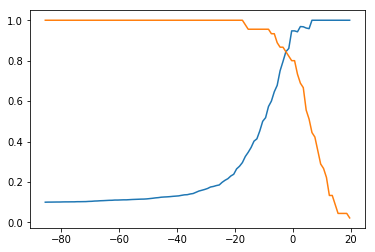

In [30]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### Precision-Recall曲线

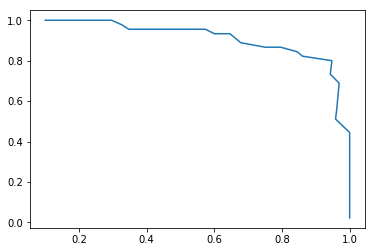

In [31]:
plt.plot(precisions, recalls)
plt.show()

### scikit-learn中的Precision-Recall曲线

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [33]:
precisions.shape

(144,)

In [34]:
recalls.shape

(144,)

In [35]:
thresholds.shape

(143,)

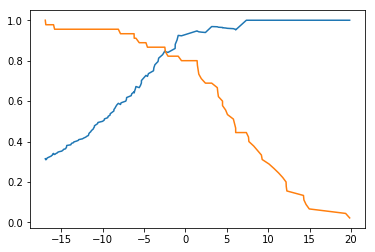

In [36]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

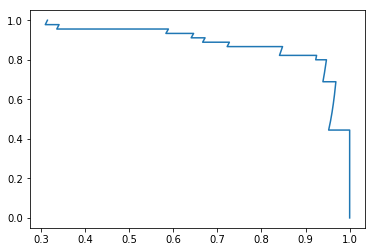

In [38]:
plt.plot(precisions, recalls)
plt.show()